### **Image Classification with CNN (MNIST)**

**Goal:** Build and train a CNN to classify 28×28 grayscale images of handwritten digits (0–9)
 from the MNIST dataset.

**Install Required Libraries**

In [1]:
!pip install tensorflow matplotlib

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

**Load and Preprocess the MNIST Dataset**

In [5]:
# Load MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape input to include channel dimension (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

**Visualize Some Images**

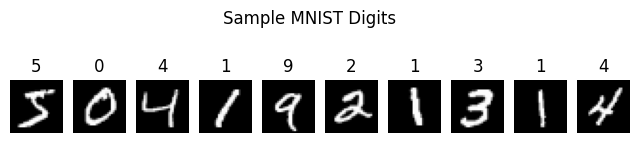

In [6]:
plt.figure(figsize=(8, 2))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.title(y_train[i])
plt.suptitle("Sample MNIST Digits")
plt.show()

**Build the CNN Model**

In [8]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 1st conv layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Downsampling
    Conv2D(64, (3, 3), activation='relu'),                           # 2nd conv layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Downsampling
    Flatten(),                                                       # Flatten feature maps
    Dense(128, activation='relu'),                                   # Fully connected layer
    Dropout(0.3),                                                    # Dropout for regularization
    Dense(10, activation='softmax')                                  # Output layer for 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile and Train the Model**

In [11]:
# Compile the model
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model with automatic validation split
history = model.fit(X_train, y_train_cat,
                  epochs=5,
                  batch_size=64,
                  validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9840 - loss: 0.0491 - val_accuracy: 0.9883 - val_loss: 0.0401
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.9892 - loss: 0.0354 - val_accuracy: 0.9902 - val_loss: 0.0342
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9906 - val_loss: 0.0332
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9897 - val_loss: 0.0359
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9877 - val_loss: 0.0462


In [12]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9854 - loss: 0.0437
Test Accuracy: 0.9887999892234802


**Evaluate the Model**

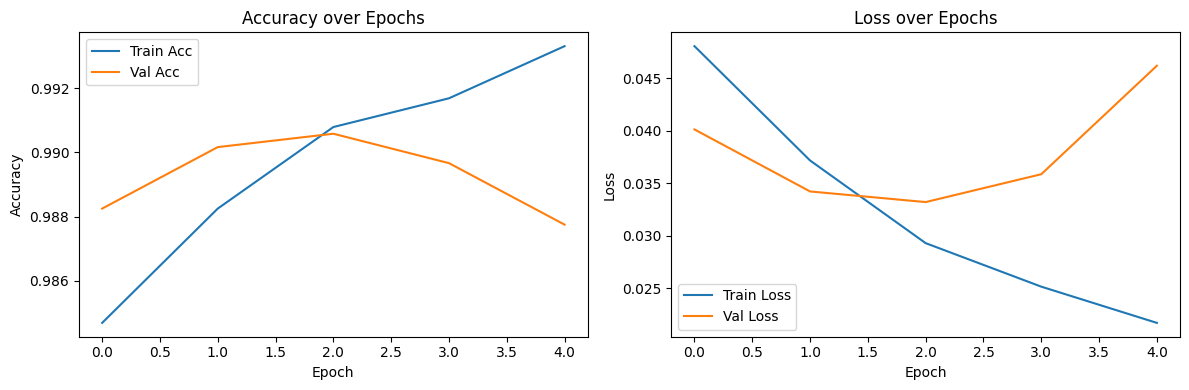

In [13]:
# Plot training vs validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

**Plot Accuracy and Loss Curves**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


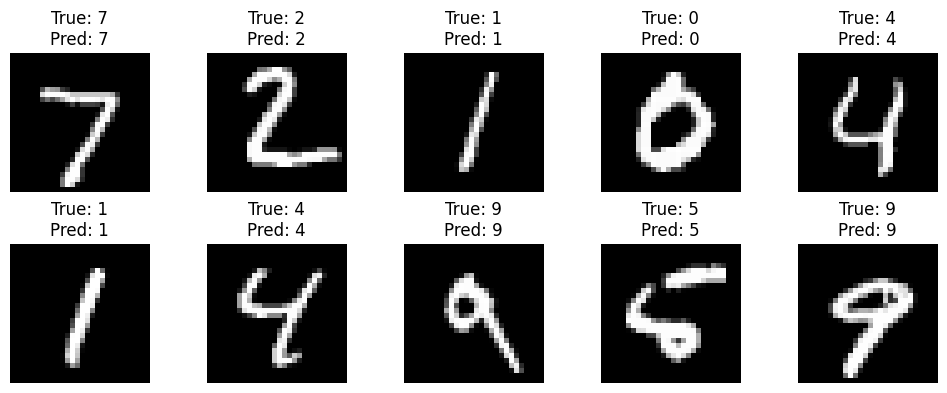

In [15]:
# Predict and visualize a few results
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Summary**
**📥 Data:**

*   Loaded MNIST dataset (28x28 grayscale images)
*   Normalized pixel values to [0, 1]
*   Reshaped images to (28, 28, 1)
*   One-hot encoded the labels

**🛠️ Model Architecture:**
1.   Conv2D(32) → MaxPooling2D
1.   Conv2D(64) → MaxPooling2D
2.   Flatten → Dense(128) → Dropout(0.3)
2.   Output: Dense(10) with softmax

**⚙️ Training:**
*   Optimizer: Adam
*   Loss: categorical_crossentropy
*   Metric: accuracy
*   Trained for 5 epochs with batch size of 64
*   Used 20% of training data for validation

**📊 Evaluation & Visualization:**
* Evaluated model on test data
* Plotted training vs. validation accuracy and loss
* Visualized predictions on sample test images

**🏆 Outcome:**

Achieved high accuracy ~98% in recognizing handwritten digits